In [11]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import PIL 

In [12]:
#random initialization centroid -->
def random_centroids(img,k_clusters,input):
    try:
        if input =="random":
            centroids = np.random.randint(low=0,high=255,size=(k_clusters,img.shape[1]))
        elif input =="in_pixels":
            centroids=img[np.random.choice(img.shape[0] , size = k_clusters , replace = False)]
    except:
        print("Please check again input !")
    return centroids

In [13]:
def calc_inner_product(v, w): # calculate inner product
        return sum(vi*wi for vi, wi in zip(v, w))
def norm_square(v):
    return calc_inner_product(v, v)
def sub_vector(v, w):   #minus 2 vector
    return [vi - wi for vi, wi in zip(v, w)]
def euclidian_distance(vector_i, vector_j):# calculate euclidean distance
        return np.sqrt(norm_square(sub_vector(vector_i,vector_j)))

# Specify the index of the labels
def indexMinDistance(distance,input):
    for i in range(len(distance)):
        if input==distance[i]:
            return i
        
# Calculate the point closest to the centroids and generate a labels   
def takeClosestCentroids(img_1d, centroids):
    labels = np.zeros(len(img_1d)) # index value correspond cluster which each pixel belongs to
    distance=[]
    for i in range(len(img_1d)):
        distance_temp=10000.0;
        distance=[]
        for j in range(len(centroids)):
            result=euclidian_distance(img_1d[i],centroids[j])
            distance.append(result)
            distance_temp = min(result,distance_temp)  
        labels[i]=indexMinDistance(distance,distance_temp)
    return labels # return index of closest centroids for each sample 


In [14]:

def updateCentroids(img, labels, old_centroids_shape):
    centroids = np.zeros(old_centroids_shape)
    for i in range(old_centroids_shape[0]):
        # Calculate new centroid using mean on rows with each cluster
        if  len(img[(labels == i)])!=0: # Prevent nan values
            centroids[i] = img[(labels == i)].mean(axis=0)
    return centroids

In [15]:
# Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).
#  python generate a k_cluster*img.shape array of ints beetween 0-255
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    centroids=random_centroids(img_1d,k_clusters,init_centroids)
    labels  = np.full(img_1d.shape[0], -1)
    
    for i in range(max_iter):
        # labels  = takeClosestCentroids_1(img_1d, centroids) Method 1 
        labels =takeClosestCentroids(img_1d, centroids) # Method 2
        old_centroids = centroids 
        # print("Truoc ki update: ",old_centroids)
        centroids = updateCentroids(img_1d, labels, centroids.shape)
        if np.allclose(old_centroids, centroids, rtol=10e-3, equal_nan=False): # 2 centroids same --> break -->Because stability
            break
    return centroids, labels
   


In [16]:
# Returns the final image after reshape
def convertOriginalSize(labels,centroids,flat_image,image):
    try:
        labels = labels.astype(int) # change int labels 
        img_result=np.zeros_like(flat_image) # create new iamge have same size with flat_image
        for i in range(len(img_result)):
            img_result[i]=centroids[(labels[i])]
        img_result=img_result.reshape(image.shape[0],image.shape[1],image.shape[2]) # reshape new image to original size 
    except:
        print("Error")
    return img_result


In [17]:
def openAndReadImage(nameImg): #Operation to open 1 photo
      image = plt.imread(nameImg)
      image = np.array(image,dtype='int64')
      return image

def iamgePreProcess(image): #pre-processing of the photo
      width=image.shape[0]
      height=image.shape[1]
      channels=image.shape[2]
      flat_image = image.reshape(width* height,channels)
      return flat_image,width, height, channels

In [18]:
# display function to output multiple images at the same time
def display(Image1,n_clusters01,Image2,n_clusters02,Image3,n_clusters03,Image4,n_clusters04):
    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 2

    # reading imag

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(Image1)
    plt.axis('off')
    plt.title(n_clusters01,color='white')

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(Image2)
    plt.axis('off')
    plt.title(n_clusters02,color='white')

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(Image3)
    plt.axis('off')
    plt.title(n_clusters03,color='white')

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(Image4)
    plt.axis('off')
    plt.title(n_clusters04,color='white')


Save successfully


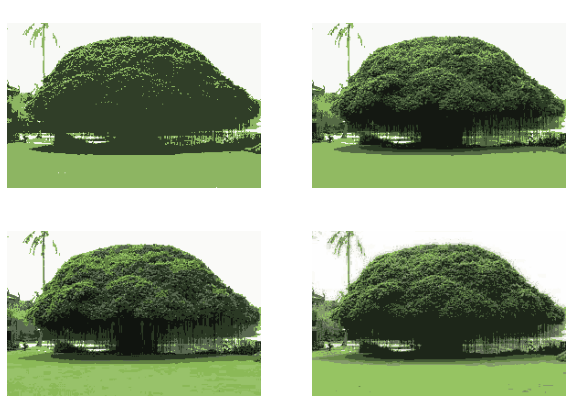

In [19]:
def main():
        nameImg=str(input("Enter name's image:"))
        image=openAndReadImage(nameImg)
        # Flat image to a 1D array to fit function's argument
        n_clusters01, n_clusters02, n_clusters03, n_clusters04=3,5,7,9
        max_iter=2
        flat_image,width,height,n_channel=iamgePreProcess(image)
        centroids01, labels01 = kmeans(flat_image,n_clusters01, max_iter, init_centroids='random')
        centroids02, labels02 = kmeans(flat_image,n_clusters02, max_iter, init_centroids='in_pixels')
        centroids03, labels03 = kmeans(flat_image,n_clusters03, max_iter, init_centroids='in_pixels')
        centroids04, labels04 = kmeans(flat_image,n_clusters04, max_iter, init_centroids='in_pixels')
        # There is a processing function, but for cases where the image is too small, for example, 6 * 6, if we pass k_cluster=17, it will report an error
        result01=convertOriginalSize(labels01,centroids01,flat_image,image)
        result02=convertOriginalSize(labels02,centroids02,flat_image,image)
        result03=convertOriginalSize(labels03,centroids03,flat_image,image)
        result04=convertOriginalSize(labels04,centroids04,flat_image,image)
        display(result01,"N_Clusters=1",result02,"N_Clusters=3",result03,"N_Clusters=5",result04,"N_Clusters=7")
        save=input("Do you want to save all image ? (Yes/No)")
        if(save=="Yes"):
            result=np.array(result04)
            number=int(input("What is the photo number?(1,2,3 and 4)"))
            if(number==1):
                   output_file = nameImg.split('.')[0]+'_result'+'.png'
                   Image.fromarray(result01.astype(np.uint8)).save(output_file)
            elif (number==2):
                   output_file = nameImg.split('.')[0]+'_result'+'.png'
                   Image.fromarray(result02.astype(np.uint8)).save(output_file)
            elif (number==3):
                   output_file = nameImg.split('.')[0]+'_result'+'.png'
                   Image.fromarray(result03.astype(np.uint8)).save(output_file)
            elif (number==4):
                  output_file = nameImg.split('.')[0]+'_result'+'.png'
                  Image.fromarray(result04.astype(np.uint8)).save(output_file)
            else:
                   print("Error!")
            print("Save successfully")
        else:
            print("Goodbye!")


if __name__ == "__main__":
    main()

###  Use the library to test

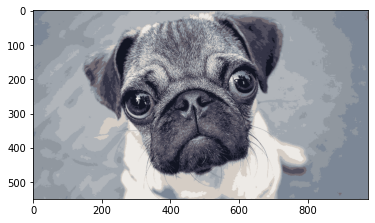

In [20]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import PIL 
img_test=plt.imread('dog.jpg')
width_test=img_test.shape[0]
height_test=img_test.shape[1]
n_channel=img_test.shape[2]
img_test=img_test.reshape(width_test*height_test,n_channel)


kmeans=KMeans(n_clusters=10).fit(img_test)
labels=kmeans.predict(img_test)
clusters=kmeans.cluster_centers_

#method 1 
img_test_2=np.zeros_like(img_test)
for i in range(len(img_test)):
    img_test_2[i]=clusters[labels[i]]

#method 2 

img_test_3=np.zeros((width_test,height_test,n_channel),dtype=np.uint8)
index=0

for i in range(width_test):
    for j in range(height_test):
        labels_of_pixel=labels[index]
        img_test_3[i][j]=clusters[labels_of_pixel]
        index=index+1
        
        
img_test_2=img_test_2.reshape(width_test,height_test,n_channel)
plt.imshow(img_test_3)
# Image.fromarray(img_test_3.astype(np.uint8)).save("Spiderman_result.png")
plt.show()